This notebook is meant to test the functions written in python to analyze AFiNES simulation output. It's going to be messy, but so it goes...

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib notebook
import pandas as pd

import afinesanalysis.afinesanalysis as aa

First a test of the readData function that reads in .txt files output by afines. Right now (9/12/2017) this only works for actins.txt

In [2]:
# Change this line if on a different system
dataFolder = '/media/daniel/storage1/local_LLM_Danny/rupture/a-1.0-p-1.0/txt_stack/'
filename = 'shortActins.txt'
domainSize=50
nbins=10
minpts=10
dr=1
rbfFunc='gaussian'
rbfEps=5
savestuff=False
nGridPts = np.ceil(domainSize/dr) + 1

txy = aa.readData(dataFolder, filename, domainSize, nbins, minpts, dr, rbfFunc, rbfEps, savestuff)

In [3]:
txy.shape

(2, 22000, 3)

Now calculate the velocity divergence. This is essentially stolen from [here](https://github.com/Simfreed/AFINES/blob/master/versatile_framework_paper/python/div_by_vbin.py#L84)

In [4]:
# Don't include the id data when getting the divergence
[xi, yi, ui, vi] = aa.interpolateVelocity(txy[:,:,:2])

xx = np.reshape(xi, (nGridPts, nGridPts))
yy = np.reshape(yi, (nGridPts, nGridPts))
uu = np.reshape(ui, (nGridPts, nGridPts))
vv = np.reshape(vi, (nGridPts, nGridPts))

imported data
calculated bin statistic
t = 0


/home/daniel/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [5]:
divergence = np.gradient(uu)[1] + np.gradient(vv)[0]
curl = np.gradient(uu)[1] * np.gradient(vv)[0] - np.gradient(uu)[0] + np.gradient(vv)[1]

<IPython.core.display.Javascript object>


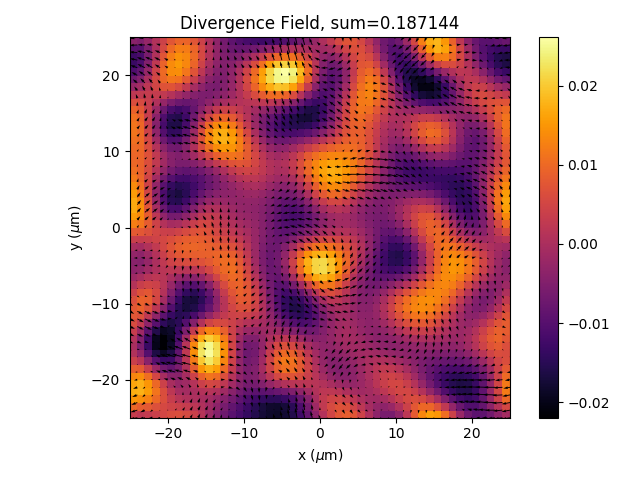

In [22]:
fig, ax = plt.subplots()
cax1 = ax.pcolor(xx, yy, divergence, cmap='inferno')
ax.set_aspect('equal')
ax.quiver(xx,yy, uu, vv)
cbar1 = fig.colorbar(cax1, ax=ax)
ax.set_xlabel('x ($\mu$m)')
ax.set_ylabel('y ($\mu$m)')
ax.set_title('Divergence Field, sum=%2f' % np.sum(divergence))
fig.tight_layout()

<IPython.core.display.Javascript object>


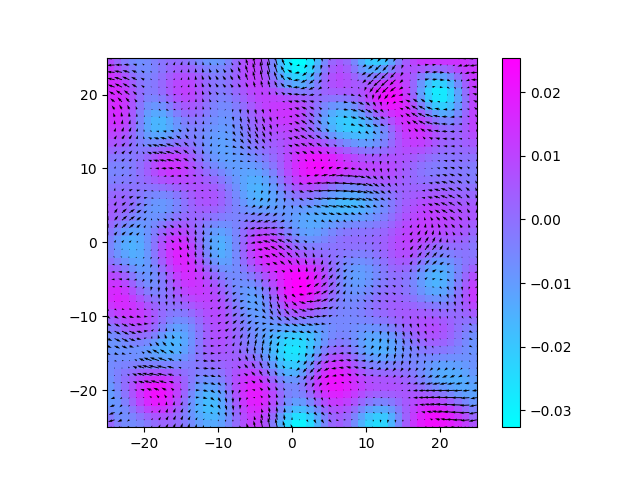

In [10]:
fig, ax = plt.subplots()
cax2 = ax.pcolor(xx, yy, curl, cmap='cool')
ax.quiver(xx,yy,uu,vv)
ax.set_aspect('equal')
cbar2 = fig.colorbar(cax2, ax=ax)
ax.set_xlabel('x ($\mu$m)')
ax.set_ylabel('y ($\mu$m)')
ax.set_title('Divergence Field, sum=%2f' % np.sum(divergence))
fig.tight_layout()

In [7]:
np.sum(divergence)

0.1871438638757259